### SAM Mask Visualizer

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

### Visualize SAM Mask with Pink Overlay, Example for only one image, works for entire folder though

In [2]:
# Dataset name
dataset = 'Wilamette'
# Input directories
jpeg_dir = f'./data/Images_{dataset}/Thermal/JPG_Calibrated'
tiff_dir = f'./output_folders/{dataset}_SAM_Masks'
# Output directory
output_dir = f'./output_folders/{dataset}_SAM_Masks_overlays'
os.makedirs(output_dir, exist_ok=True)

# Get list of JPEG files
jpeg_files = [f for f in os.listdir(jpeg_dir) if f.lower().endswith('.jpg')]

# Process each JPEG file
for jpeg_file in tqdm(jpeg_files, desc="Processing images"):
    filename = os.path.splitext(jpeg_file)[0]  # Remove .JPG extension
    
    jpeg_path = os.path.join(jpeg_dir, jpeg_file)
    tiff_path = os.path.join(tiff_dir, f"{filename}.TIFF")

    # Ensure the corresponding TIFF file exists
    if not os.path.exists(tiff_path):
        print(f"Skipping {jpeg_file}, no matching TIFF found.")
        continue

    # Load the JPEG image
    image = cv2.imread(jpeg_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Load the TIFF mask
    mask = Image.open(tiff_path)
    mask = np.array(mask)

    # Ensure mask is binary (0 and 1)
    mask = (mask > 0).astype(np.uint8)

    # Resize mask to match image size
    mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Create an overlay (magenta color where mask is 1)
    overlay = image.copy()
    overlay[mask_resized == 1] = [255, 0, 255]  # Magenta overlay

    # Blend original image and overlay
    alpha = 0.6  # Transparency factor
    blended = cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)

    # Save the overlaid image
    output_path = os.path.join(output_dir, f"{filename}.JPG")
    Image.fromarray(blended).save(output_path)

print(f"Processing complete. Overlay images saved in {output_dir}")


Processing images: 100%|██████████| 5/5 [00:00<00:00, 71.45it/s]

Skipping 00002.JPG, no matching TIFF found.
Skipping 00003.JPG, no matching TIFF found.
Skipping 00004.JPG, no matching TIFF found.
Skipping 00005.JPG, no matching TIFF found.
Processing complete. Overlay images saved in ./output_folders/Wilamette_SAM_Masks_overlays


### Side-By-Side Comparison With Overlay

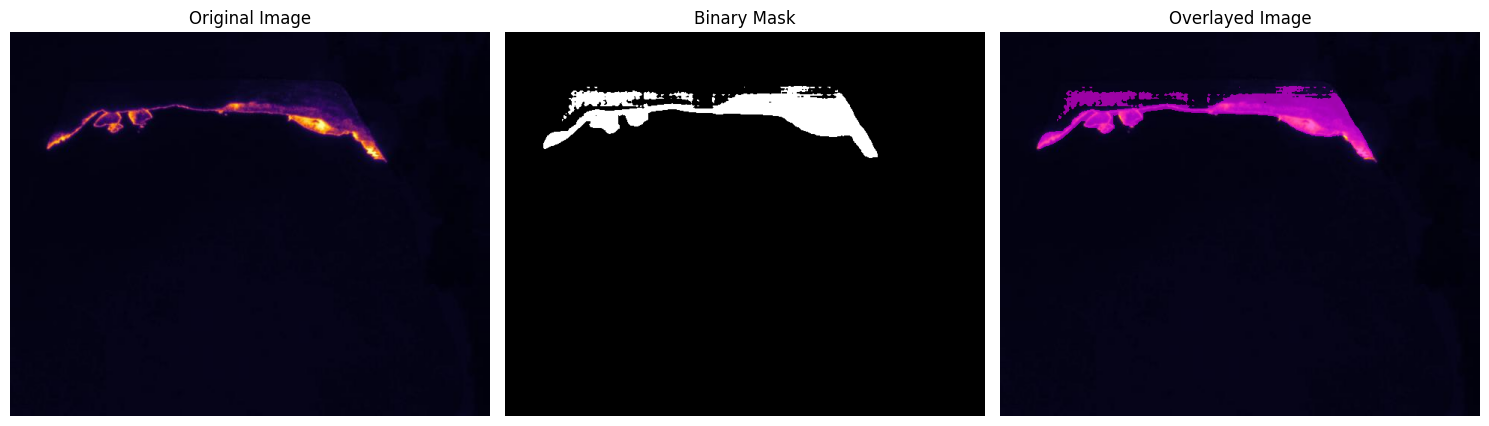

In [3]:
# Dataset name
dataset = 'Wilamette'
imageNum = '00001'
# Input directories
jpeg_dir = f'./data/Images_{dataset}/Thermal/JPG_Calibrated/{imageNum}.JPG'
tiff_path = f'./output_folders/{dataset}_SAM_Masks/{imageNum}.TIFF'

# Load the JPEG image
image = cv2.imread(jpeg_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct visualization

# Load the TIFF mask
mask = Image.open(tiff_path)
mask = np.array(mask)

# Ensure mask is binary (0 and 1)
mask = (mask > 0).astype(np.uint8)

# Resize mask to match image size
mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

# Create an overlay (red color where mask is 1)
overlay = image.copy()
overlay[mask_resized == 1] = [255, 0, 255]  # Red overlay

# Blend original image and overlay
alpha = 0.6  # Transparency factor
blended = cv2.addWeighted(image, 1 - alpha, overlay, alpha, 0)

# Matplotlib visualization
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(mask_resized, cmap="gray")
ax[1].set_title("Binary Mask")
ax[1].axis("off")

ax[2].imshow(blended)
ax[2].set_title("Overlayed Image")
ax[2].axis("off")

plt.tight_layout()

# Save the entire figure as a single image
output_path = f"./output_images/{dataset}_SAM_Mask_Overlay_Comparison_{imageNum}.JPG" 
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()